In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression


Matplotlib is building the font cache; this may take a moment.


In [2]:
directory = 'data'
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
for file in csv_files:
    exec(f"{file.split('-')[0]} = pd.read_csv(os.path.join(directory, file))")
    print(f"loading data-frame {file.split('-')[0]} ")


loading data-frame Train_Beneficiarydata 
loading data-frame Train 
loading data-frame Test 
loading data-frame Train_Inpatientdata 
loading data-frame Test_Beneficiarydata 
loading data-frame Train_Outpatientdata 
loading data-frame Test_Inpatientdata 
loading data-frame Test_Outpatientdata 


In [3]:
Train_Beneficiarydata.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [4]:
Train_Inpatientdata.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [5]:
Train_Outpatientdata.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [6]:
Train.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


So the goal of this project is to predict the Potential Fraud given Provider, Beneficiery and Hospital Bill details. Before diving deep, let's look at the target class distribution

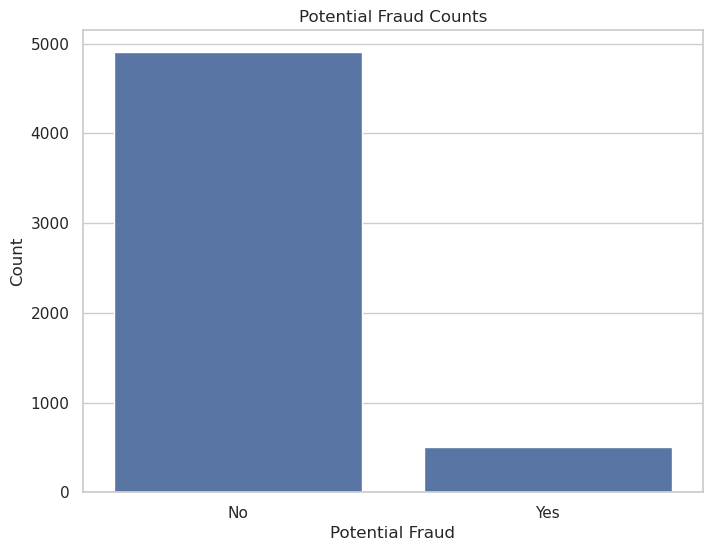

PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='PotentialFraud', data=Train)
plt.title('Potential Fraud Counts')
plt.xlabel('Potential Fraud')
plt.ylabel('Count')
plt.show()
Train['PotentialFraud'].value_counts()

It's very easy to look at this as highly imbalanced dataset. I assumed the same and applied class imbalance algorithms like oversampling and SMOTE but that was not adding to the result. Then realised that once you join provider data to patient data, this is quite balanced dataset already. We will see later 

In [8]:
Train_Inpatientdata = Train_Inpatientdata.merge(Train, on='Provider', how='left')
Train_Outpatientdata = Train_Outpatientdata.merge(Train, on='Provider', how='left')


Let's understand the fraud distribution in both Inpatient and Outpatient data 

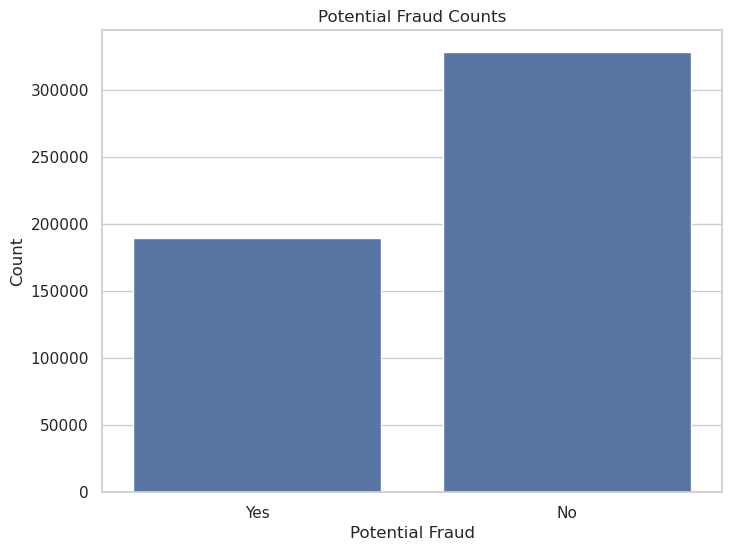

PotentialFraud
No     328343
Yes    189394
Name: count, dtype: int64

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='PotentialFraud', data=Train_Outpatientdata)
plt.title('Potential Fraud Counts')
plt.xlabel('Potential Fraud')
plt.ylabel('Count')
plt.show()
Train_Outpatientdata['PotentialFraud'].value_counts()

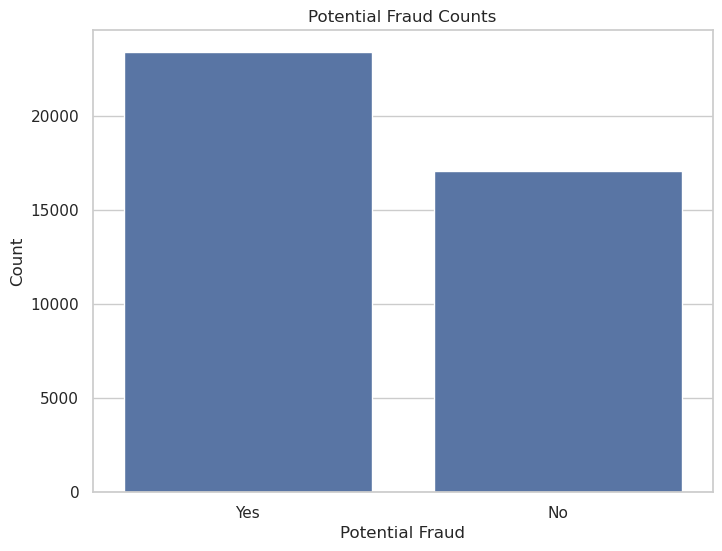

PotentialFraud
Yes    23402
No     17072
Name: count, dtype: int64

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='PotentialFraud', data=Train_Inpatientdata)
plt.title('Potential Fraud Counts')
plt.xlabel('Potential Fraud')
plt.ylabel('Count')
plt.show()
Train_Inpatientdata['PotentialFraud'].value_counts()


That shows that fraauds are more prevalent in inpatient situations.

In [11]:
Train_Inpatientdata.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'PotentialFraud'],
      dtype='object')

In [12]:
Train_Outpatientdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [13]:
Train_Outpatientdata.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'PotentialFraud'],
      dtype='object')

In [14]:
set(Train_Inpatientdata.columns) - set(Train_Outpatientdata.columns)

{'AdmissionDt', 'DiagnosisGroupCode', 'DischargeDt'}

In [15]:
set(Train_Outpatientdata.columns) - set(Train_Inpatientdata.columns) 

set()

Only 3 columns are differs both the dataset. It is better to combine them which will enhance the richness of the overall dataset.

In [16]:
train_patientdata = pd.concat([Train_Inpatientdata, Train_Outpatientdata],ignore_index=True)

In [17]:
len(train_patientdata.columns)

31

In [18]:
Train_All = pd.merge(train_patientdata,Train_Beneficiarydata,on="BeneID", how='left')

In [19]:
Train_All['PotentialFraud'].value_counts()

PotentialFraud
No     345415
Yes    212796
Name: count, dtype: int64

As mentioned before, This is not a typical imbalanced dataset. So Re-sampling did not help much. I have commented out the code that was used earlier

In [20]:
# # 1. Random Oversampling
# y_train = Train_All.loc[:,'PotentialFraud']
# X_train = Train_All.loc[:,Train_All.columns != 'PotentialFraud']
# ros = RandomOverSampler(random_state=42)
# X_ros, y_ros = ros.fit_resample(X_train, y_train)
# print('Random Oversampling:', sorted(dict(zip(*np.unique(y_ros, return_counts=True))).items()))

# # 2. Random Undersampling
# rus = RandomUnderSampler(random_state=42)
# X_rus, y_rus = rus.fit_resample(X_train, y_train)
# print('Random Undersampling:', sorted(dict(zip(*np.unique(y_rus, return_counts=True))).items()))

# # Example to show how many instances per class
# print(f"Original dataset shapes: {y_train.value_counts()}")
# print(f"Resampled dataset shapes with ROS: {pd.Series(y_ros).value_counts()}")
# print(f"Resampled dataset shapes with RUS: {pd.Series(y_rus).value_counts()}")

In [21]:
Train_All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   AdmissionDt                      40474 non-null   object 
 10  ClmAdmitDiagnosisCode            145899 non-null  object 
 11  DeductibleAmtPaid                557312 non-null  float64
 12  Di

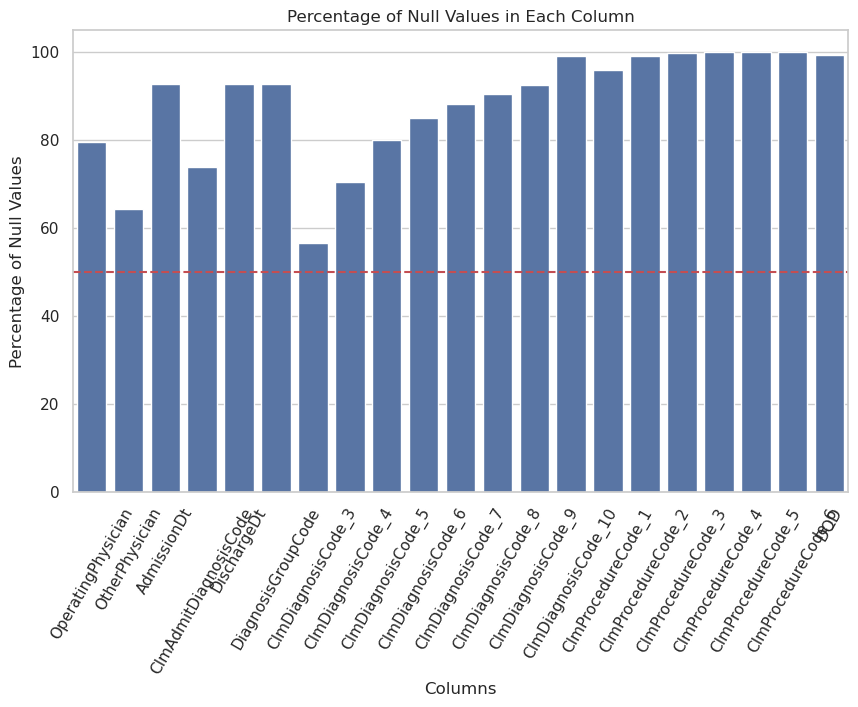

In [22]:
null_percent = Train_All.isnull().mean() * 100 
null_percent_50 = null_percent[null_percent>50]
plt.figure(figsize=(10, 6))

sns.barplot(x=null_percent_50.index, y=null_percent_50)
plt.title('Percentage of Null Values in Each Column')
plt.ylabel('Percentage of Null Values')
plt.xlabel('Columns')
plt.xticks(rotation=60)  # Rotate x-axis labels to 45 degrees
plt.axhline(50, color='r', linestyle='--')  # line to indicate the 50% threshold
plt.show()

In [23]:
# Filter out columns with more than 90% null values
columns_to_drop = null_percent[null_percent > 50].index
print("Columns to drop:", columns_to_drop)

Columns to drop: Index(['OperatingPhysician', 'OtherPhysician', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DOD'],
      dtype='object')


'AdmissionDt', 'DischargeDt', 'DiagnosisGroupCode' are only present in In-patient data, so we can't delete them.  'OperatingPhysician', 'OtherPhysician','ClmAdmitDiagnosisCode' are very important features and we can use it to do feature engineering. Hence not deleting these columns even if they have more null. 

In [24]:
columns_to_drop = list(set(columns_to_drop) - set({'OperatingPhysician', 'OtherPhysician', 'AdmissionDt','ClmAdmitDiagnosisCode', 'DischargeDt', 'DiagnosisGroupCode'}))

In [25]:
Train_All = Train_All.loc[:, ~Train_All.columns.isin(columns_to_drop)]

We need to deal with all the categorical features before we can impute values.

In [26]:
Train_All.loc[Train_All['AttendingPhysician'].isna(), 'AttendingPhysician'] = 'N/A'
Train_All.loc[Train_All['OperatingPhysician'].isna(), 'OperatingPhysician'] = 'N/A'
Train_All.loc[Train_All['OtherPhysician'].isna(), 'OtherPhysician'] = 'N/A'
Train_All.loc[Train_All['DiagnosisGroupCode'].isna(), 'DiagnosisGroupCode'] = 'N/A'
Train_All.loc[Train_All['ClmAdmitDiagnosisCode'].isna(), 'ClmAdmitDiagnosisCode'] = 'N/A'
Train_All.loc[Train_All['ClmDiagnosisCode_1'].isna(), 'ClmDiagnosisCode_1'] = 'N/A'
Train_All.loc[Train_All['ClmDiagnosisCode_2'].isna(), 'ClmDiagnosisCode_2'] = 'N/A'

Most of the columns are taken care of except DischargeDt, AdmissionDt, and DeductibleAmtPaid. We will deal with DischargeDt, and AdmissionDt a bit differently using the domain knowledge. We can assume that for people who never had admission and discharge can be considered as never admitted to hospital. So we will create a new feature called HospitalStay. 

In [27]:
Train_All['AdmissionDt'] = pd.to_datetime(Train_All['AdmissionDt'])
Train_All['DischargeDt'] = pd.to_datetime(Train_All['DischargeDt'])
Train_All['HospitalStay'] = (Train_All['DischargeDt'] - Train_All['AdmissionDt']).dt.days
Train_All.loc[Train_All['HospitalStay'].isna(), 'HospitalStay'] = 0
Train_All['HospitalStay'] = Train_All['HospitalStay'].astype('int64')

In [28]:
Train_All['ClaimStartDt'] = pd.to_datetime(Train_All['ClaimStartDt'])
Train_All['ClaimEndDt'] = pd.to_datetime(Train_All['ClaimEndDt'])
Train_All['DOB'] = pd.to_datetime(Train_All['DOB'])

Train_All['ClaimStartDt'] = (Train_All['ClaimStartDt'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
Train_All['ClaimEndDt'] = (Train_All['ClaimEndDt'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
Train_All['DOB'] = (Train_All['DOB'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [29]:
Train_All.loc[Train_All['RenalDiseaseIndicator'] == 'Y', 'RenalDiseaseIndicator'] = 1
Train_All['RenalDiseaseIndicator'] = Train_All['RenalDiseaseIndicator'].astype('int64')
median_of_DeductibleAmtPaid = Train_All['DeductibleAmtPaid'].median()
Train_All['DeductibleAmtPaid'] = Train_All['DeductibleAmtPaid'].fillna(median_of_DeductibleAmtPaid)
Train_All.drop(columns=['AdmissionDt','DischargeDt'], inplace=True)

In [30]:
Train_All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 39 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  int64  
 3   ClaimEndDt                       558211 non-null  int64  
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               558211 non-null  object 
 7   OperatingPhysician               558211 non-null  object 
 8   OtherPhysician                   558211 non-null  object 
 9   ClmAdmitDiagnosisCode            558211 non-null  object 
 10  DeductibleAmtPaid                558211 non-null  float64
 11  DiagnosisGroupCode               558211 non-null  object 
 12  Cl

Till now, we have looked at all data using interactive programming. It helps to understand the data intially but we should always refactor them into a meaningful functions which we can use in pipelines. So lets integrate all the code in meaningful functions below

In [31]:
def load_data(directory, data):
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    dfs = []
    for file in csv_files:
        file_prefix = (file.split('-')[0]).split('_')[0]
        if file_prefix == data:
            df = pd.read_csv(os.path.join(directory, file))
            dfs.append(df)
            print(f"Loading DataFrame from {file}")
    if len(dfs) >= 4:
        return dfs[0], dfs[1], dfs[2], dfs[3]
    else:
        raise ValueError("Not enough data frames found matching the criteria.")

In [32]:
def preprocess_data(Target,df_Inpatientdata,df_Outpatientdata,df_Beneficiarydata):
       df_Inpatientdata = df_Inpatientdata.merge(Target, on='Provider', how='left')
       df_Outpatientdata = df_Outpatientdata.merge(Target, on='Provider', how='left')
       df_patientdata = pd.concat([df_Inpatientdata, df_Outpatientdata],ignore_index=True)
       df_All = pd.merge(df_patientdata,df_Beneficiarydata,on="BeneID", how='left')
       columns_to_drop = ['ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
              'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
              'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
              'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
              'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DOD']
       df_All = df_All.loc[:, ~df_All.columns.isin(columns_to_drop)]
       df_All.loc[df_All['AttendingPhysician'].isna(), 'AttendingPhysician'] = 'N/A'
       df_All.loc[df_All['OperatingPhysician'].isna(), 'OperatingPhysician'] = 'N/A'
       df_All.loc[df_All['OtherPhysician'].isna(), 'OtherPhysician'] = 'N/A'
       df_All.loc[df_All['DiagnosisGroupCode'].isna(), 'DiagnosisGroupCode'] = 'N/A'
       df_All['DiagnosisGroupCode'] = df_All['DiagnosisGroupCode'].astype(str)
       df_All.loc[df_All['ClmAdmitDiagnosisCode'].isna(), 'ClmAdmitDiagnosisCode'] = 'N/A'
       df_All.loc[df_All['ClmDiagnosisCode_1'].isna(), 'ClmDiagnosisCode_1'] = 'N/A'
       df_All.loc[df_All['ClmDiagnosisCode_2'].isna(), 'ClmDiagnosisCode_2'] = 'N/A'
       df_All['AdmissionDt'] = pd.to_datetime(df_All['AdmissionDt'])
       df_All['DischargeDt'] = pd.to_datetime(df_All['DischargeDt'])
       df_All['HospitalStay'] = (df_All['DischargeDt'] - df_All['AdmissionDt']).dt.days
       df_All.loc[df_All['HospitalStay'].isna(), 'HospitalStay'] = 0
       df_All['HospitalStay'] = df_All['HospitalStay'].astype('int64')
       df_All['ClaimStartDt'] = pd.to_datetime(df_All['ClaimStartDt'])
       df_All['ClaimEndDt'] = pd.to_datetime(df_All['ClaimEndDt'])
       df_All['DOB'] = pd.to_datetime(df_All['DOB'])
       df_All['ClaimStartDt'] = (df_All['ClaimStartDt'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
       df_All['ClaimEndDt'] = (df_All['ClaimEndDt'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
       df_All['DOB'] = (df_All['DOB'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
       df_All.loc[df_All['RenalDiseaseIndicator'] == 'Y', 'RenalDiseaseIndicator'] = 1
       df_All['RenalDiseaseIndicator'] = df_All['RenalDiseaseIndicator'].astype('int64')
       df_All.drop(columns=['AdmissionDt','DischargeDt'], inplace=True)
       #df_All = df_All.dropna()
       #df_All = df_All.dropduplicates()
       return df_All

In [33]:
def feature_engineering(train_data,test_data,columns_to_encode):

    def physician_same(row):
        # Check if all three physicians are the same
        if row["AttendingPhysician"] == row["OperatingPhysician"] == row["OtherPhysician"]:
            return 0
        # Check if Attending and Operating are the same but different from Other
        elif row["AttendingPhysician"] == row["OperatingPhysician"]:
            return 1
        # Check if Operating and Other are the same but different from Attending
        elif row["OperatingPhysician"] == row["OtherPhysician"]:
            return 2
        # All three are different
        else:
            return 3
    
    train_data['Physician_coded'] = train_data.apply(physician_same, axis=1)
    test_data['Physician_coded'] = test_data.apply(physician_same, axis=1)

    label_encoder = LabelEncoder()
    train_data['Provider'] = train_data['Provider'].astype(str)
    test_data['Provider'] = test_data['Provider'].astype(str)
    unique_values = np.concatenate([train_data['Provider'].unique(), test_data['Provider'].unique()])
    label_encoder.fit(unique_values)
    train_data['Provider'] = label_encoder.fit_transform(train_data['Provider'])
    test_data['Provider'] = test_data['Provider'].apply(lambda x: label_encoder.transform([x])[0] if x in label_encoder.classes_ else -1)



    y_train_data = train_data['PotentialFraud']
    X_train_data = train_data.drop('PotentialFraud', axis=1)
    X_train, X_val, y_train, y_val = train_test_split(X_train_data, y_train_data, test_size=0.20, random_state=42)
    

    median_of_DeductibleAmtPaid = X_train['DeductibleAmtPaid'].median()
    #X_train['No_of_claims'] = 

    X_train = X_train.drop(columns_not_numeric, axis=1)
    X_val = X_val.drop(columns_not_numeric, axis=1)

    X_train['DeductibleAmtPaid'] = X_train['DeductibleAmtPaid'].fillna(median_of_DeductibleAmtPaid)
    X_val['DeductibleAmtPaid'] = X_val['DeductibleAmtPaid'].fillna(median_of_DeductibleAmtPaid)
    test_data['DeductibleAmtPaid'] = test_data['DeductibleAmtPaid'].fillna(median_of_DeductibleAmtPaid)
    
    final_features = X_train.columns

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    
    y_train = y_train.map({'Yes': 1, 'No': 0})
    y_val = y_val.map({'Yes': 1, 'No': 0})

    return X_train, X_val, y_train, y_val,final_features


In [34]:
Test_target,Test_Beneficiarydata,Test_Inpatientdata,Test_Outpatientdata = load_data(directory = 'data', data = 'Test')
Train_Beneficiarydata,Train_target,Train_Inpatientdata,Train_Outpatientdata = load_data(directory = 'data', data = 'Train')

Loading DataFrame from Test-1542969243754.csv
Loading DataFrame from Test_Beneficiarydata-1542969243754.csv
Loading DataFrame from Test_Inpatientdata-1542969243754.csv
Loading DataFrame from Test_Outpatientdata-1542969243754.csv
Loading DataFrame from Train_Beneficiarydata-1542865627584.csv
Loading DataFrame from Train-1542865627584.csv
Loading DataFrame from Train_Inpatientdata-1542865627584.csv
Loading DataFrame from Train_Outpatientdata-1542865627584.csv


In [35]:
train_data = preprocess_data(Train_target,Train_Inpatientdata,Train_Outpatientdata,Train_Beneficiarydata)
test_data = preprocess_data(Test_target,Test_Inpatientdata,Test_Outpatientdata,Test_Beneficiarydata)

In [36]:
columns_not_numeric = ['BeneID','ClaimID','Provider','AttendingPhysician','OperatingPhysician','OtherPhysician','ClmAdmitDiagnosisCode',
                            'ClmDiagnosisCode_1','ClmDiagnosisCode_2','DiagnosisGroupCode']
X_train, X_val, y_train, y_val,final_features = feature_engineering(train_data,test_data,columns_not_numeric)

In [38]:
print(X_val.shape)
print(X_train.shape)

(111643, 29)
(446568, 29)


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

log_reg = LogisticRegression()

# Fit the model
log_reg.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = log_reg.predict(X_val)

# Print predictions
print("Predictions on validation set:", y_pred_val)

# Optionally, print evaluation metrics
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_val))
print("\nClassification Report:\n", classification_report(y_val, y_pred_val))


Predictions on validation set: [0 1 0 ... 0 0 0]

Confusion Matrix:
 [[65672  3311]
 [38116  4544]]

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.95      0.76     68983
           1       0.58      0.11      0.18     42660

    accuracy                           0.63    111643
   macro avg       0.61      0.53      0.47    111643
weighted avg       0.61      0.63      0.54    111643



In [40]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)

# Train the model
dtree.fit(X_train, y_train)
y_pred_val = dtree.predict(X_val)

# Print predictions
print("Predictions on validation set:", y_pred_val)

# Optionally, print evaluation metrics
print("\nConfusion Matrix:\n", confusion_matrix( y_pred_val,y_val))
print("\nClassification Report:\n", classification_report(y_pred_val,y_val))

Predictions on validation set: [0 0 1 ... 0 0 0]

Confusion Matrix:
 [[51870 16929]
 [17113 25731]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75     68799
           1       0.60      0.60      0.60     42844

    accuracy                           0.70    111643
   macro avg       0.68      0.68      0.68    111643
weighted avg       0.69      0.70      0.69    111643



In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)
y_pred_val = dtree.predict(X_val)

# Print predictions
print("Predictions on validation set:", y_pred_val)

# Optionally, print evaluation metrics
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_val))
print("\nClassification Report:\n", classification_report(y_val, y_pred_val))

Predictions on validation set: [0 0 1 ... 0 0 0]

Confusion Matrix:
 [[51870 17113]
 [16929 25731]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75     68983
           1       0.60      0.60      0.60     42660

    accuracy                           0.70    111643
   macro avg       0.68      0.68      0.68    111643
weighted avg       0.70      0.70      0.70    111643



In [43]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gb_classifier.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = gb_classifier.predict(X_val)

# Print predictions
print("Predictions on validation set:", y_pred_val)

# Optionally, print evaluation metrics
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_val))
print("\nClassification Report:\n", classification_report(y_val, y_pred_val))


Predictions on validation set: [0 1 0 ... 0 0 0]

Confusion Matrix:
 [[61626  7357]
 [28097 14563]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.89      0.78     68983
           1       0.66      0.34      0.45     42660

    accuracy                           0.68    111643
   macro avg       0.68      0.62      0.61    111643
weighted avg       0.68      0.68      0.65    111643



In [46]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 6.9 MB/s eta 0:00:00:00:0100:01


In [47]:
import xgboost as xgb

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Fit the model on the training data
xgb_classifier.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = xgb_classifier.predict(X_val)

print("Predictions on validation set:", y_pred_val)

# Optionally, print evaluation metrics
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_val))
print("\nClassification Report:\n", classification_report(y_val, y_pred_val))

Predictions on validation set: [0 1 0 ... 0 0 0]

Confusion Matrix:
 [[61626  7357]
 [28097 14563]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.89      0.78     68983
           1       0.66      0.34      0.45     42660

    accuracy                           0.68    111643
   macro avg       0.68      0.62      0.61    111643
weighted avg       0.68      0.68      0.65    111643



In [48]:
from sklearn.model_selection import GridSearchCV



xgb_classifier = xgb.XGBClassifier()

# Define the parameter grid
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best validation accuracy: ", grid_search.best_score_)

# Predict on the validation set using the best found parameters
y_val_pred = grid_search.predict(X_val)

print("Predictions on validation set:", y_val_pred)

# Optionally, print evaluation metrics
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters found:  {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}
Best validation accuracy:  0.7618055928772325
Predictions on validation set: [0 1 0 ... 0 0 0]

Confusion Matrix:
 [[59894  9089]
 [17604 25056]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82     68983
           1       0.73      0.59      0.65     42660

    accuracy                           0.76    111643
   macro avg       0.75      0.73      0.74    111643
weighted avg       0.76      0.76      0.75    111643



AUC Score: 0.8159983853961751


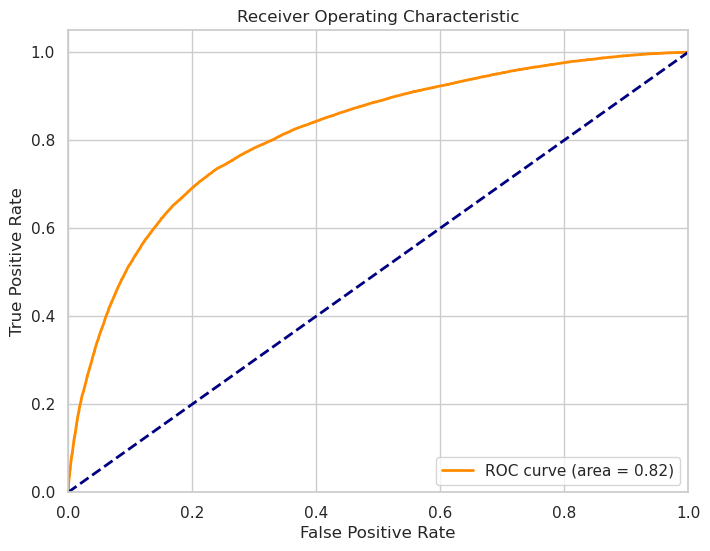

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Assuming best_model is your fitted XGBoost model
# Make sure to use predict_proba to get the probabilities required for the ROC curve
y_scores = grid_search.best_estimator_.predict_proba(X_val)[:, 1]  # probabilities of the positive class

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_val, y_scores)
roc_auc = auc(fpr, tpr)

# Compute the AUC score as a single number
auc_score = roc_auc_score(y_val, y_scores)
print("AUC Score:", auc_score)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Let us look at the feature importances. 

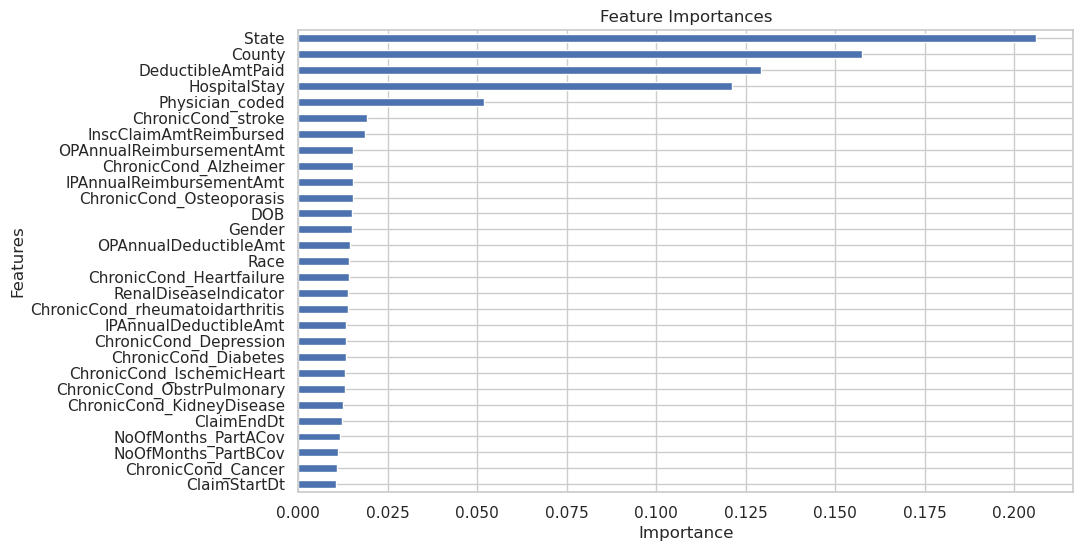

In [54]:
importances = grid_search.best_estimator_.feature_importances_

# Assuming importances and feature_names are already defined
importances_df = pd.DataFrame(importances, index=final_features, columns=["Importance"])

# Sort the features by importance and then reverse the DataFrame for better plotting
importances_df = importances_df.sort_values(by="Importance", ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
importances_df.Importance.plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
